# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
 
X Education wants to make lead identification process more efficient and wishes to identify the most potential leads (Hot Leads). 
If they successfully identify hot leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with and nurturing the potential leads (i.e. educating the leads about the product, constantly communicating etc. ) rather than making calls to everyone. 

X Education needs help in selecting the most promising leads (leads that are most likely to convert into paying customers).
The company wants a model where each lead is assigned a lead score such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 
The CEO has given a ballpark of the target lead conversion rate to be around 80%.

The dataset of around 9000 historical data points, provided for building the model, consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. 

The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. 

You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

# Objective

1. Build a machine learning model to assign a lead score between 0 and 100 to each of the leads, which can then be used by the company to target potential leads. A higher score would mean that the lead has a higher chance of conversion.

2. Using the model, obtain a target lead conversion rate of around 80%

3. The model should be able to adjust to new problems presented if the company’s requirements change in the future.


# Dataset Dictionary

The dataset of around 9000 historical data points, provided for building the model, consists of various attributes.

The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

**Prospect ID**: A unique ID with which the customer is identified.<br>
**Lead Number**: A lead number assigned to each lead procured.<br>
**Lead Origin**: The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.<br>
**Lead Source**: The source of the lead. Includes Google, Organic Search, Olark Chat, etc.<br>
**Do Not Email**: An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.<br>
**Do Not Call**: An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.<br>
**Converted**: The target variable. Indicates whether a lead has been successfully converted or not.<br>
**TotalVisits**: The total number of visits made by the customer on the website.<br>
**Total Time Spent on Website**: The total time spent by the customer on the website.<br>
**Page Views Per Visit**: Average number of pages on the website viewed during the visits.<br>
**Last Activity**: Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.<br>
**Country**: The country of the customer.<br>
**Specialization**: The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.<br>
**How did you hear about X Education**: The source from which the customer heard about X Education.<br>
**What is your current occupation**: Indicates whether the customer is a student, umemployed or employed.<br>
**What matters most to you in choosing this course**: An option selected by the customer indicating what is their main motto behind doing this course.<br>
**Search**: Indicating whether the customer had seen the ad through search.<br>
**Magazine**: Indicating whether the customer had seen the ad through a magazine.<br>
**Newspaper Article**: Indicating whether the customer had seen the ad through a newspaper article.<br>
**X Education Forums**: Indicating whether the customer had seen the ad through an X Education forum.<br>
**Newspaper**: Indicating whether the customer had seen the ad through a newspaper.<br>
**Digital Advertisement**: Indicating whether the customer had seen the ad through a digital advertisement.<br>
**Through Recommendations**: Indicates whether the customer came in through recommendations.<br>
**Receive More Updates About Our Courses**: Indicates whether the customer chose to receive more updates about the courses.<br>
**Tags**: Tags assigned to customers indicating the current status of the lead.<br>
**Lead Quality**: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.<br>
**Update me on Supply Chain Content**: Indicates whether the customer wants updates on the Supply Chain Content.<br>
**Get updates on DM Content**: Indicates whether the customer wants updates on the DM Content.<br>
**Lead Profile**: A lead level assigned to each customer based on their profile.<br>
**City**: The city of the customer.<br>
**Asymmetrique Activity Index**: An index assigned to each customer based on their activity.<br>
**Asymmetrique Profile Index**: An index assigned to each customer based on their profile.<br>
**Asymmetrique Activity Score**: A score assigned to each customer based on their activity.<br>
**Asymmetrique Profile Score**: A score assigned to each customer based on their profile.<br>
**I agree to pay the amount through cheque**: Indicates whether the customer has agreed to pay the amount through cheque or not.<br>
**a free copy of Mastering The Interview**: Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.<br>
**Last Notable Activity**: The last notable acitivity performed by the student.

# High level steps

1. Read and understand the data
2. Data cleaning
3. Data preparation
4. Model building
5. Model validation
6. Final analysis and recommendations

In [1]:
# import necessary libraries and set default configurations
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",200)

# 1. Read and understand the data

In [2]:
# Import and read dataset
leads_org_df = pd.read_csv("Leads.csv")
leads_df = leads_org_df
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Check dimension of leads_df
leads_df.shape

(9240, 37)

In [4]:
# Check data spread of leads_df
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Check column types
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# List columns with null values and sort by percentage
nacolumns = round((leads_df.isnull().sum()/len(leads_df.index))*100,2)
nacolumns = nacolumns.drop(nacolumns[nacolumns ==0].index).sort_values(ascending=False)
nacolumns

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

### Observation

* 17 out of 37 columns have null values. Will need to inspect handle the null values during data cleaning.

In [7]:
# List columns with "Select" values and sort by percentage. "Select" is essentially same as null values.
selectcolumns = round((leads_df[leads_df == "Select"].count()/len(leads_df.index))*100,2)
selectcolumns = selectcolumns.drop(selectcolumns[selectcolumns == 0].index).sort_values(ascending=False)
selectcolumns

How did you hear about X Education    54.58
Lead Profile                          44.87
City                                  24.34
Specialization                        21.02
dtype: float64

### Observation

* 4 out of 37 columns have values equal to "Select", which is essentially null values. Will need to change "Select" values to null for further null values treatment.

In [8]:
# "Select" values are essentially Null values so we need to replace "Select" values with Null
leads_df.replace(to_replace='Select', value=np.nan, inplace= True)

In [9]:
# Now that "Select" has been replaced to Null, recheck Null values
nacolumns = round((leads_df.isnull().sum()/len(leads_df.index))*100,2)
nacolumns = nacolumns.drop(nacolumns[nacolumns ==0].index).sort_values(ascending=False)
nacolumns

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

### Observation

* 17 out of 37 columns have null values. Will need to inspect handle the null values during data cleaning.

# 2. Data cleaning

## Handle null values
* Investigate columns with null values and take measures to correct

In [10]:
# Dropping the columns with missing value percentage over 40%
# How did you hear about X Education, Lead Profile, Lead Quality, Asymmetrique Profile Score, Asymmetrique Activity Score, Asymmetrique Profile Index
#     , and Asymmetrique Activity Index all have missing values over 40%
# From looking at the value counts of the columns and the data dictionary, dropping columns as these columns have no value in modeling
leads_df= leads_df.dropna(axis=1, thresh= int(0.6*len(leads_df)))

In [11]:
# City has close to 40% of missing values so will drop
leads_df = leads_df.drop('City',axis=1)

In [12]:
# Specialization column has over 36% of missing values so checking value counts of the column
round((leads_df['Specialization'].value_counts(dropna=False)/len(leads_df.index))*100,2)

NaN                                  36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

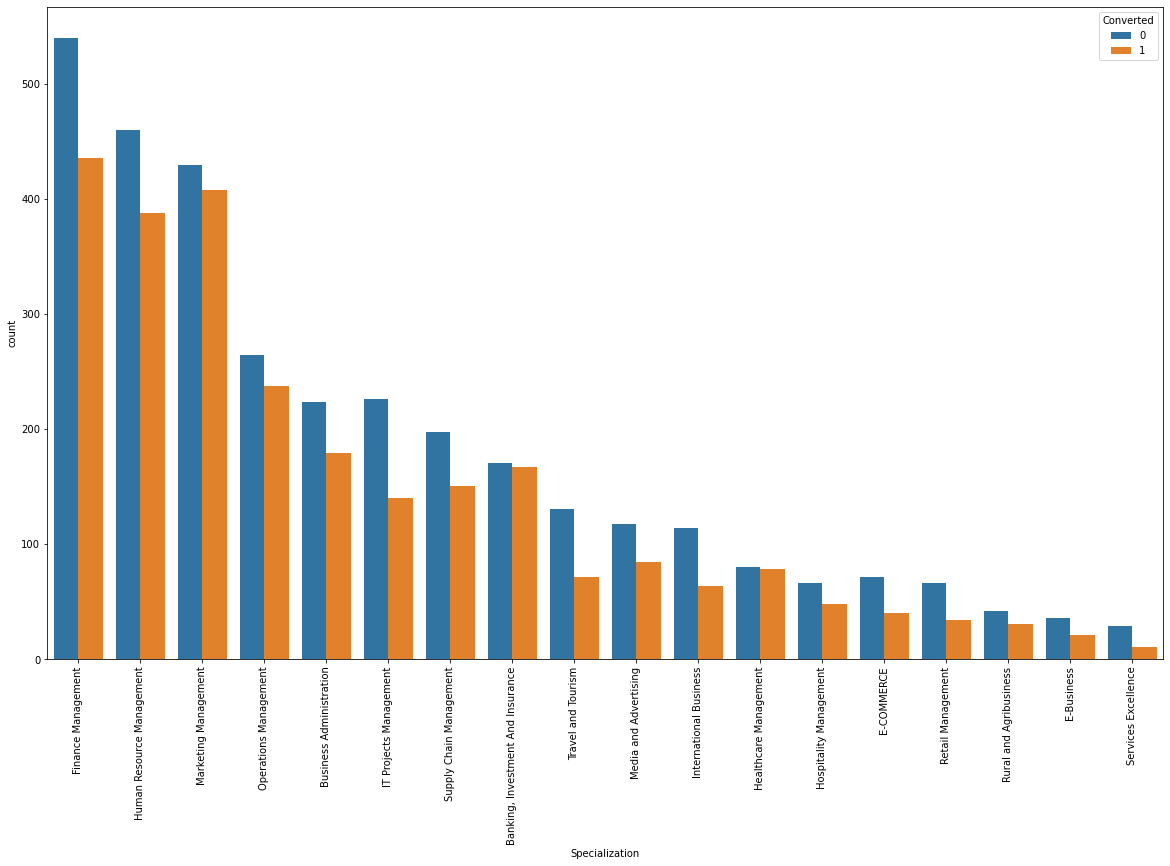

In [13]:
# Even though missing values are quite high, we need to investigate if this variable adds any value to the model or not
# plotting the Specialization columnn  

plt.figure(figsize=(20,12))
s1=sns.countplot(leads_df.Specialization, hue=leads_df.Converted, order = leads_df['Specialization'].value_counts().index)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Observation
* We can clearly see that certain Specializations (most of the 'Manegement' ones and 'Banking, Investment And Insurance') have a much higher rate of conversion than the average.
* The business can focus on these high conversion Specialzations
* We will impute the Null values with another category 'Not Selected'

In [14]:
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Not Selected') #imputing null value

In [15]:
#Rechecking value counts of Specialization variables
leads_df['Specialization'].value_counts(dropna=False)

Not Selected                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
# Tags column has over 36% of missing values so checking value counts of the column
round((leads_df['Tags'].value_counts(dropna=False)/len(leads_df.index))*100,2)

NaN                                                  36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.

### Observation
* Tags has 36.29% Null value, 22.42% "Will revert after reading the email", 13.02% "Ringing"
* Values are not of great value so will drop column

In [17]:
# Tags will be dropped based on previous observation
leads_df = leads_df.drop('Tags',axis=1)

In [18]:
# 'What matters most to you in choosing a course' column has over 29% of missing values.
# Check the value counts of 'What matters most to you in choosing a course' column
round((leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)/len(leads_df.index))*100,2)

Better Career Prospects      70.65
NaN                          29.32
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

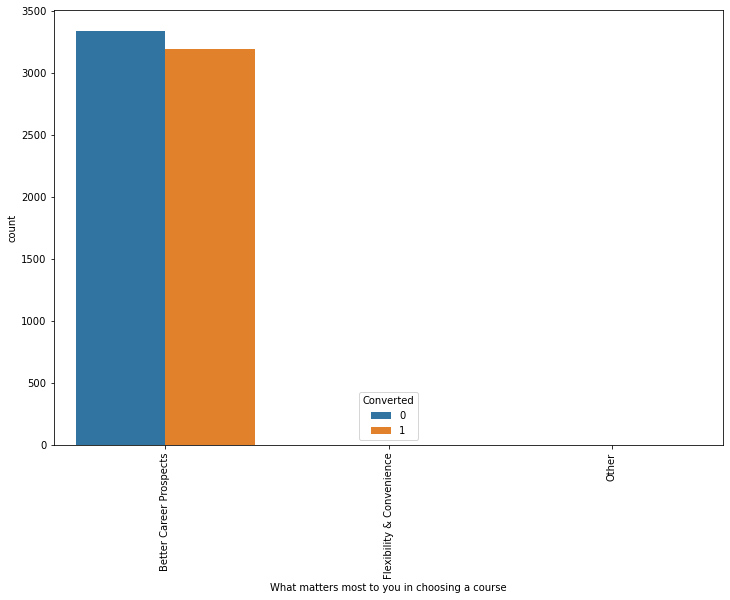

In [19]:
# Even though missing values are quite high, we need to investigate if this variable adds any value to the model or not
# plotting the 'What matters most to you in choosing a course' columnn  

plt.figure(figsize=(12,8))
s1=sns.countplot(leads_df['What matters most to you in choosing a course'], hue=leads_df.Converted, order=leads_df['What matters most to you in choosing a course'].value_counts().index)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Observation
* The variation in the non-null values is almost zero, as almost all the non-null values are 'Better Career Prospects'.
* Even if we impute the null values with 'Better Career Prospects', it will not add any value to the model. Hence, we will drop this variable

In [20]:
# Dropping the 'What matters most to you in choosing a course' column
leads_df = leads_df.drop(['What matters most to you in choosing a course'], axis=1)

In [21]:
# 'What is your current occupation' column has over 29% of missing values.
# Check the value counts of 'What is your current occupation' column
round((leads_df['What is your current occupation'].value_counts(dropna=False)/len(leads_df.index))*100,2)

Unemployed              60.61
NaN                     29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

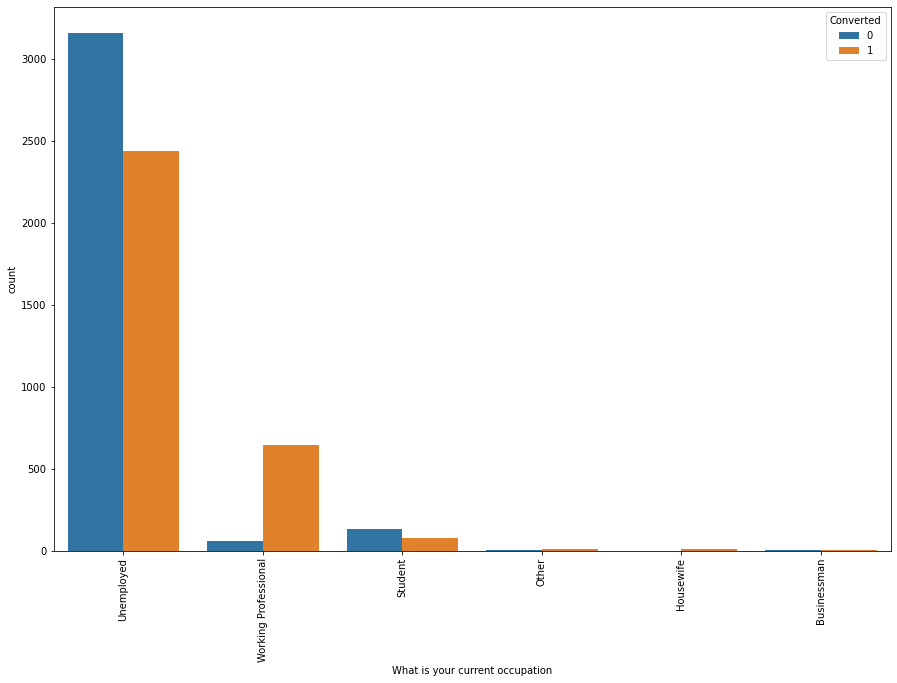

In [22]:
# Plotting the 'What is your current occupation' column 
plt.figure(figsize=(15,10))
s1=sns.countplot(leads_df['What is your current occupation'], hue=leads_df.Converted, order=leads_df['What is your current occupation'].value_counts().index)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Observation
* We can clearly see that conversion rate is extremely good for 'Working Professional' category. Hence, the business can effectivery target this category'.
* We will not drop this variable, and instead impute the null values with 'Not Selected'

In [23]:
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not Selected') #imputing null value

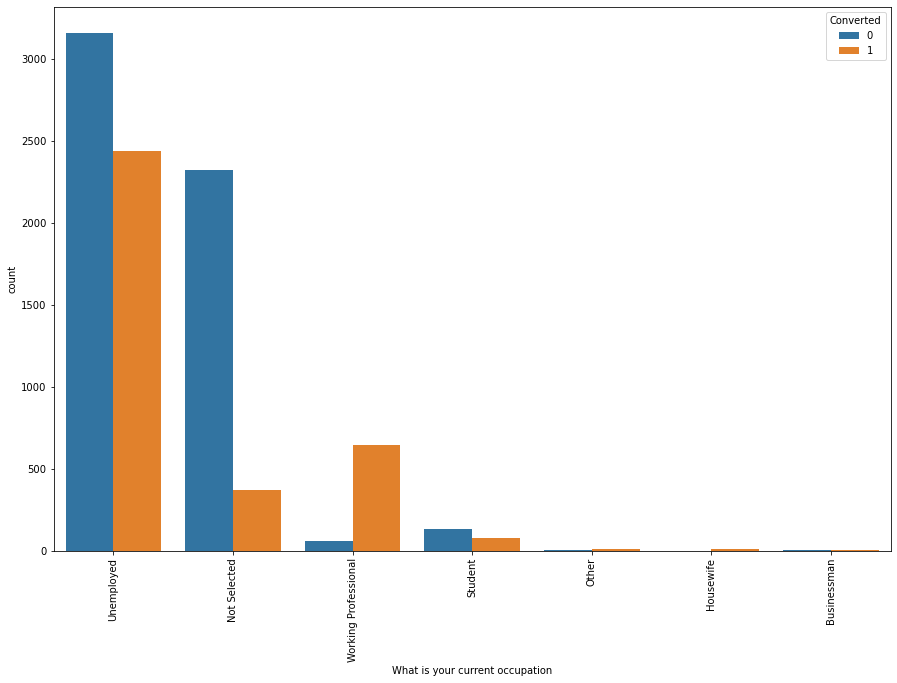

In [24]:
# Replotting the 'What is your current occupation' column 
plt.figure(figsize=(15,10))
s1=sns.countplot(leads_df['What is your current occupation'], hue=leads_df.Converted, order=leads_df['What is your current occupation'].value_counts().index)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Observation
* We can further deduce that the conversion rate is extremely poor among those who do not specify their current occupation

In [25]:
# 'Country' column has over 26% of missing values.
# Check the value counts of 'Country' column
round((leads_df['Country'].value_counts(dropna=False)/len(leads_df.index))*100,2)

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Kuwait                   0.04
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Germany                  0.04
Sweden                   0.03
Philippines              0.02
Uganda                   0.02
Italy                    0.02
Bangladesh               0.02
Netherlands              0.02
Asia/Pacific Region      0.02
China                    0.02
Belgium                  0.02
Ghana                    0.02
Kenya                    0.01
Sri Lanka                0.01
Tanzania                 0.01
Malaysia                 0.01
Liberia   

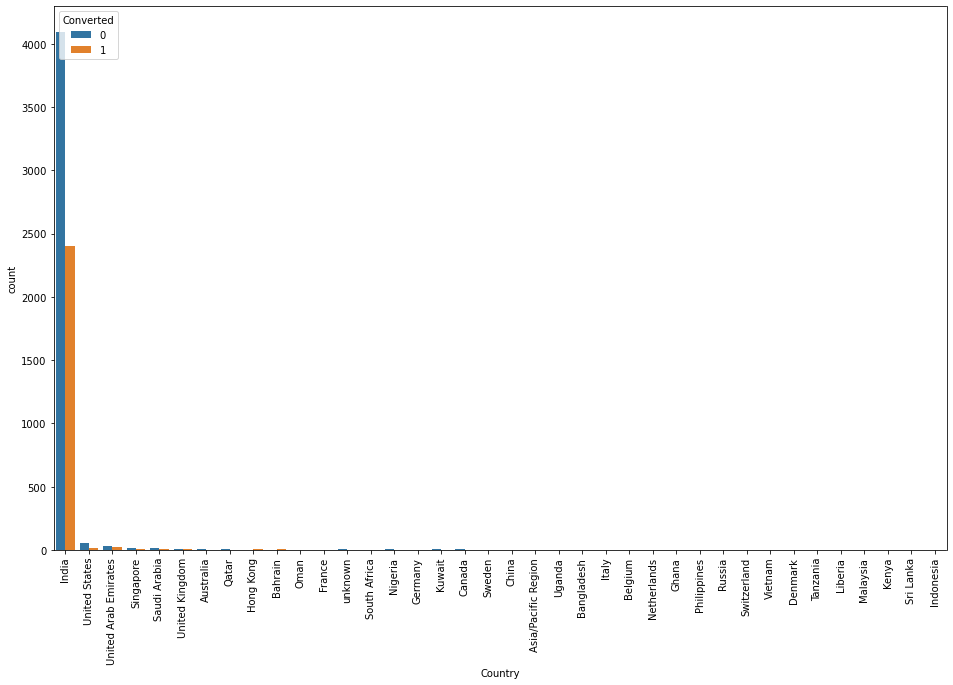

In [26]:
# plotting the 'Country' columnn  
plt.figure(figsize=(16,10))
s1=sns.countplot(leads_df['Country'], hue=leads_df.Converted, order=leads_df['Country'].value_counts().index)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Observation
* The variation in the non-null values is almost zero, as almost all the non-null values are 'India'.
* Even if we impute the null values with 'India', it will not add any value to the model. Hence, we will drop this variable

In [27]:
# Dropping the 'Country' column
leads_df = leads_df.drop(['Country'], axis=1)

In [28]:
# Four columns have missing value percentage between .39% to 1.48%. (TotalVisits, Page Views Per Visit, Last Activity, Lead Source)
# Missing percentages are very low so we will drop all rows with missing values without significant loss of predictive power
leads_df=leads_df.dropna()

In [29]:
# Check shape of dataframe
leads_df.shape

(9074, 26)

### Observation
* Number of records has come down slightly from 9240 to 9074

In [30]:
# Recheck columns with null values and sort by percentage
nacolumns = round((leads_df.isnull().sum()/len(leads_df.index))*100,2)
nacolumns = nacolumns.drop(nacolumns[nacolumns ==0].index).sort_values(ascending=False)
nacolumns

Series([], dtype: float64)

### Observation
* We have taken care of all null values so can proceed with data preparation

## Handle data spread of categorical variables
* Check data spread of all columns

In [31]:
leads_df['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [32]:
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [33]:
# Google and google are the same so changing google to Google
# Some values are extremely low and doesn't help with modeling so combining values into "Other"
replace_values = {'Facebook':'Other','bing':'Other','google':'Google','Click2call':'Other','Press_Release':'Other','Social Media':'Other'
                  ,'Live Chat':'Other','youtubechannel':'Other','testone':'Other','Pay per Click Ads':'Other'
                  ,'welearnblog_Home':'Other','WeLearn':'Other','blog':'Other','NC_EDM':'Other'}
leads_df = leads_df.replace({"Lead Source": replace_values})

In [34]:
leads_df['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [35]:
leads_df['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

### Observation
* Do Not Call has mostly No values, can drop

In [36]:
# Dropping 'Do Not Call' column as pre previous observation
leads_df = leads_df.drop(['Do Not Call'], axis=1)

In [37]:
leads_df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [38]:
# Some values are extremely low (below 10 records) and doesn't help with modeling combining values into "Other"
replace_values = {'View in browser link Clicked':'Other','Approached upfront':'Other','Email Received':'Other'
                  ,'Click2call':'Other','Email Marked Spam':'Other','Visited Booth in Tradeshow':'Other','Resubscribed to emails':'Other'}
leads_df = leads_df.replace({"Last Activity": replace_values})

In [39]:
leads_df['Specialization'].value_counts()

Not Selected                         3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [40]:
leads_df['What is your current occupation'].value_counts()

Unemployed              5476
Not Selected            2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [41]:
# Check value counts of Yes/No columns
leads_yn_df = leads_df[['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'
                ,'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content'
                ,'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']]
leads_yn_df.apply(pd.Series.value_counts)

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
No,9060,9074.0,9072,9073,9073,9070,9067,9074.0,9074.0,9074.0,9074.0,6186
Yes,14,NaN,2,1,1,4,7,NaN,NaN,NaN,NaN,2888


### Observation
* Other than "A free copy of Mastering The Interview" column, all values are very skewed
* Will drop all Yes/No columns except for "A free copy of Mastering The Interview"

In [42]:
leads_df.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'
                ,'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content'
                ,'Get updates on DM Content','I agree to pay the amount through cheque'], axis=1, inplace=True)

In [43]:
leads_df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [44]:
# Last Notable Activity is input by sales staff
replace_values = {'Email Marked Spam':'Other','Approached upfront':'Other','Resubscribed to emails':'Other','View in browser link Clicked':'Other'
                  ,'Form Submitted on Website':'Other','Email Received':'Other'}
leads_df = leads_df.replace({"Last Notable Activity": replace_values})

In [45]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Selected,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Selected,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Selected,Unemployed,No,Modified


## Additional Data Checks
* Check Last Activity and Last Notable Activity

In [46]:
leads_df['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Had a Phone Conversation       25
Other                          17
Name: Last Activity, dtype: int64

In [47]:
leads_df['Last Notable Activity'].value_counts()

Modified                    3267
Email Opened                2823
SMS Sent                    2152
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  45
Unreachable                   32
Had a Phone Conversation      14
Other                          7
Name: Last Notable Activity, dtype: int64

### Observation
* From looking at Last Activity and Last Notable Activity, these columns contain actions taken by the Sales team. 
* Since the problem is for the model to give a prediction on lead conversion before sales team takes action, these two columns will be dropped

In [48]:
# Dropping 'Do Not Call' column as pre previous observation
leads_df = leads_df.drop(['Last Activity','Last Notable Activity'], axis=1)

In [49]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Not Selected,Unemployed,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Not Selected,Unemployed,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Not Selected,Unemployed,No


## Convert binary variables (Yes/No) to 1/0
- Convert Yes/No values to binary representation

In [50]:
# List of binary columns to map
binarylist = ['Do Not Email','A free copy of Mastering The Interview']

# Defining map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Apply function to leads_df
leads_df[binarylist] = leads_df[binarylist].apply(binary_map)

In [51]:
# Inspect dataframe
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Not Selected,Unemployed,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Not Selected,Unemployed,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Not Selected,Unemployed,0


## Checking and handle Outliers


In [52]:
# Checking for outliers in the continuous variables
num_leads_df = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [53]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


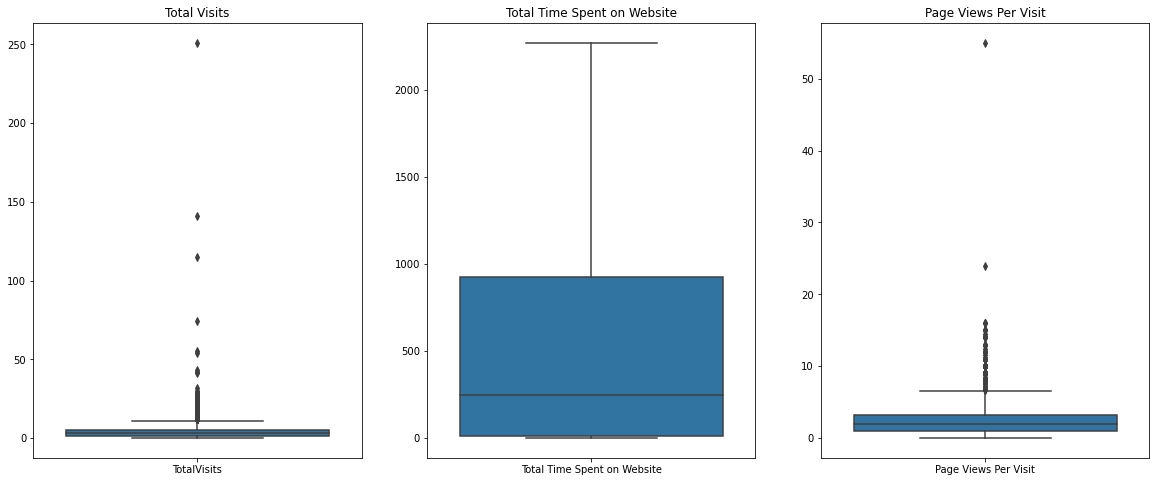

In [54]:
# Checking the outliers in a Boxplot
plt.figure(figsize=[20,8])
plt.rcParams["axes.labelsize"] = 10

plt.subplot(1, 3, 1)
sns.boxplot(data=leads_df[['TotalVisits']])
plt.title('Total Visits')

plt.subplot(1, 3, 2)
sns.boxplot(data=leads_df[['Total Time Spent on Website']])
plt.title('Total Time Spent on Website')

plt.subplot(1, 3, 3)
sns.boxplot(data=leads_df[['Page Views Per Visit']])
plt.title('Page Views Per Visit')
plt.show()
    

### Observations
* Variables 'TotalVisits' and 'Page Views Per Visit' have outliers which needs be treated 

In [55]:
# removing (statistical) outliers

# outlier treatment for TotalVisits
Q1 = leads_df['TotalVisits'].quantile(0.05)
Q3 = leads_df['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
leads_df = leads_df[(leads_df['TotalVisits'] >= Q1 - 1.5*IQR) & (leads_df['TotalVisits'] <= Q3 + 1.5*IQR)]

# outlier treatment for 'Page Views Per Visits'
Q1 = leads_df['Page Views Per Visit'].quantile(0.05)
Q3 = leads_df['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads_df = leads_df[(leads_df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads_df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

In [56]:
# Rechecking for outliers in the continuous variables
num_leads_df = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

# Rechecking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9048.000000,9048.000000,9048.000000
mean,3.327697,482.994584,2.350491
std,3.292078,545.531995,2.051093
min,0.000000,0.000000,0.000000
25%,1.000000,10.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,924.000000,3.000000
90%,7.000000,1374.300000,5.000000
95%,9.000000,1557.000000,6.000000
99%,16.000000,1839.000000,9.000000


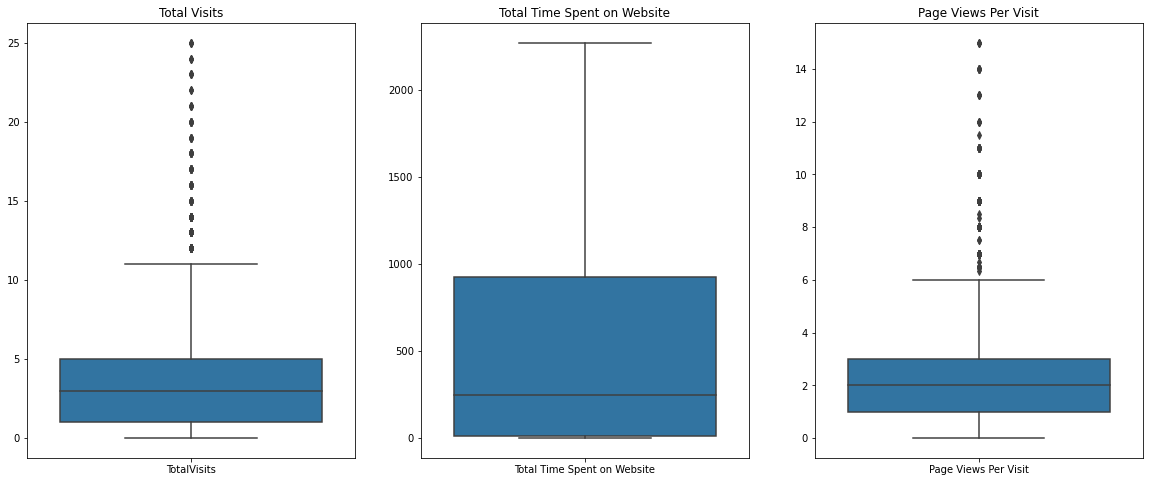

In [57]:
# Checking the outliers in a Boxplot
plt.figure(figsize=[20,8])
plt.rcParams["axes.labelsize"] = 10

plt.subplot(1, 3, 1)
sns.boxplot(data=leads_df[['TotalVisits']])
plt.title('Total Visits')

plt.subplot(1, 3, 2)
sns.boxplot(data=leads_df[['Total Time Spent on Website']])
plt.title('Total Time Spent on Website')

plt.subplot(1, 3, 3)
sns.boxplot(data=leads_df[['Page Views Per Visit']])
plt.title('Page Views Per Visit')
plt.show()
    

## Create dummy features for multi level categorical variables
- Create dummy features (one-hot encoded) for categorical variables with multiple levels

In [58]:
# Create dummy variables
dummy1 = pd.get_dummies(leads_df[['Lead Origin','Lead Source','Specialization', 'What is your current occupation']], drop_first=True)


# Add results back to leads_df
leads_df = pd.concat([leads_df, dummy1], axis=1)

In [59]:
# We have created dummies for the below variables, so we can drop them
leads_df = leads_df.drop(['Lead Origin','Lead Source','Specialization', 'What is your current occupation'], 1)


In [60]:
# We can drop the variables 'Lead Number' as well as they do not add any value to the model
leads_df = leads_df.drop(['Lead Number','Prospect ID'], 1)

In [61]:
leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Selected,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


## Train-Test Split
Train-Test split technique to evaluate the performance of the machine learning algorithm

In [62]:
# Putting feature variable to X
X = leads_df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Selected,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [63]:
# Putting response variable to y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [64]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

## Feature Scaling
* There are some columns with varying numerical depth/scale. Scaling those columns will help in model building.

In [65]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Selected,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
2974,1,-0.412549,-0.084157,-0.177210,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8085,0,-1.026500,-0.889721,-1.162310,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8805,0,-0.105573,1.885815,0.315340,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8270,0,0.201403,-0.375258,0.807890,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5584,1,0.815354,2.237334,1.792991,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [66]:
# Checking the Converted Rate
# Getting a sense of imbalance in the data
converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
converted

37.8868258178603

#### Observations:
- Though the dataset is imbalanced, it's not too bad
- Only around 38 percent of leads get converted currently

## Looking for Correlations

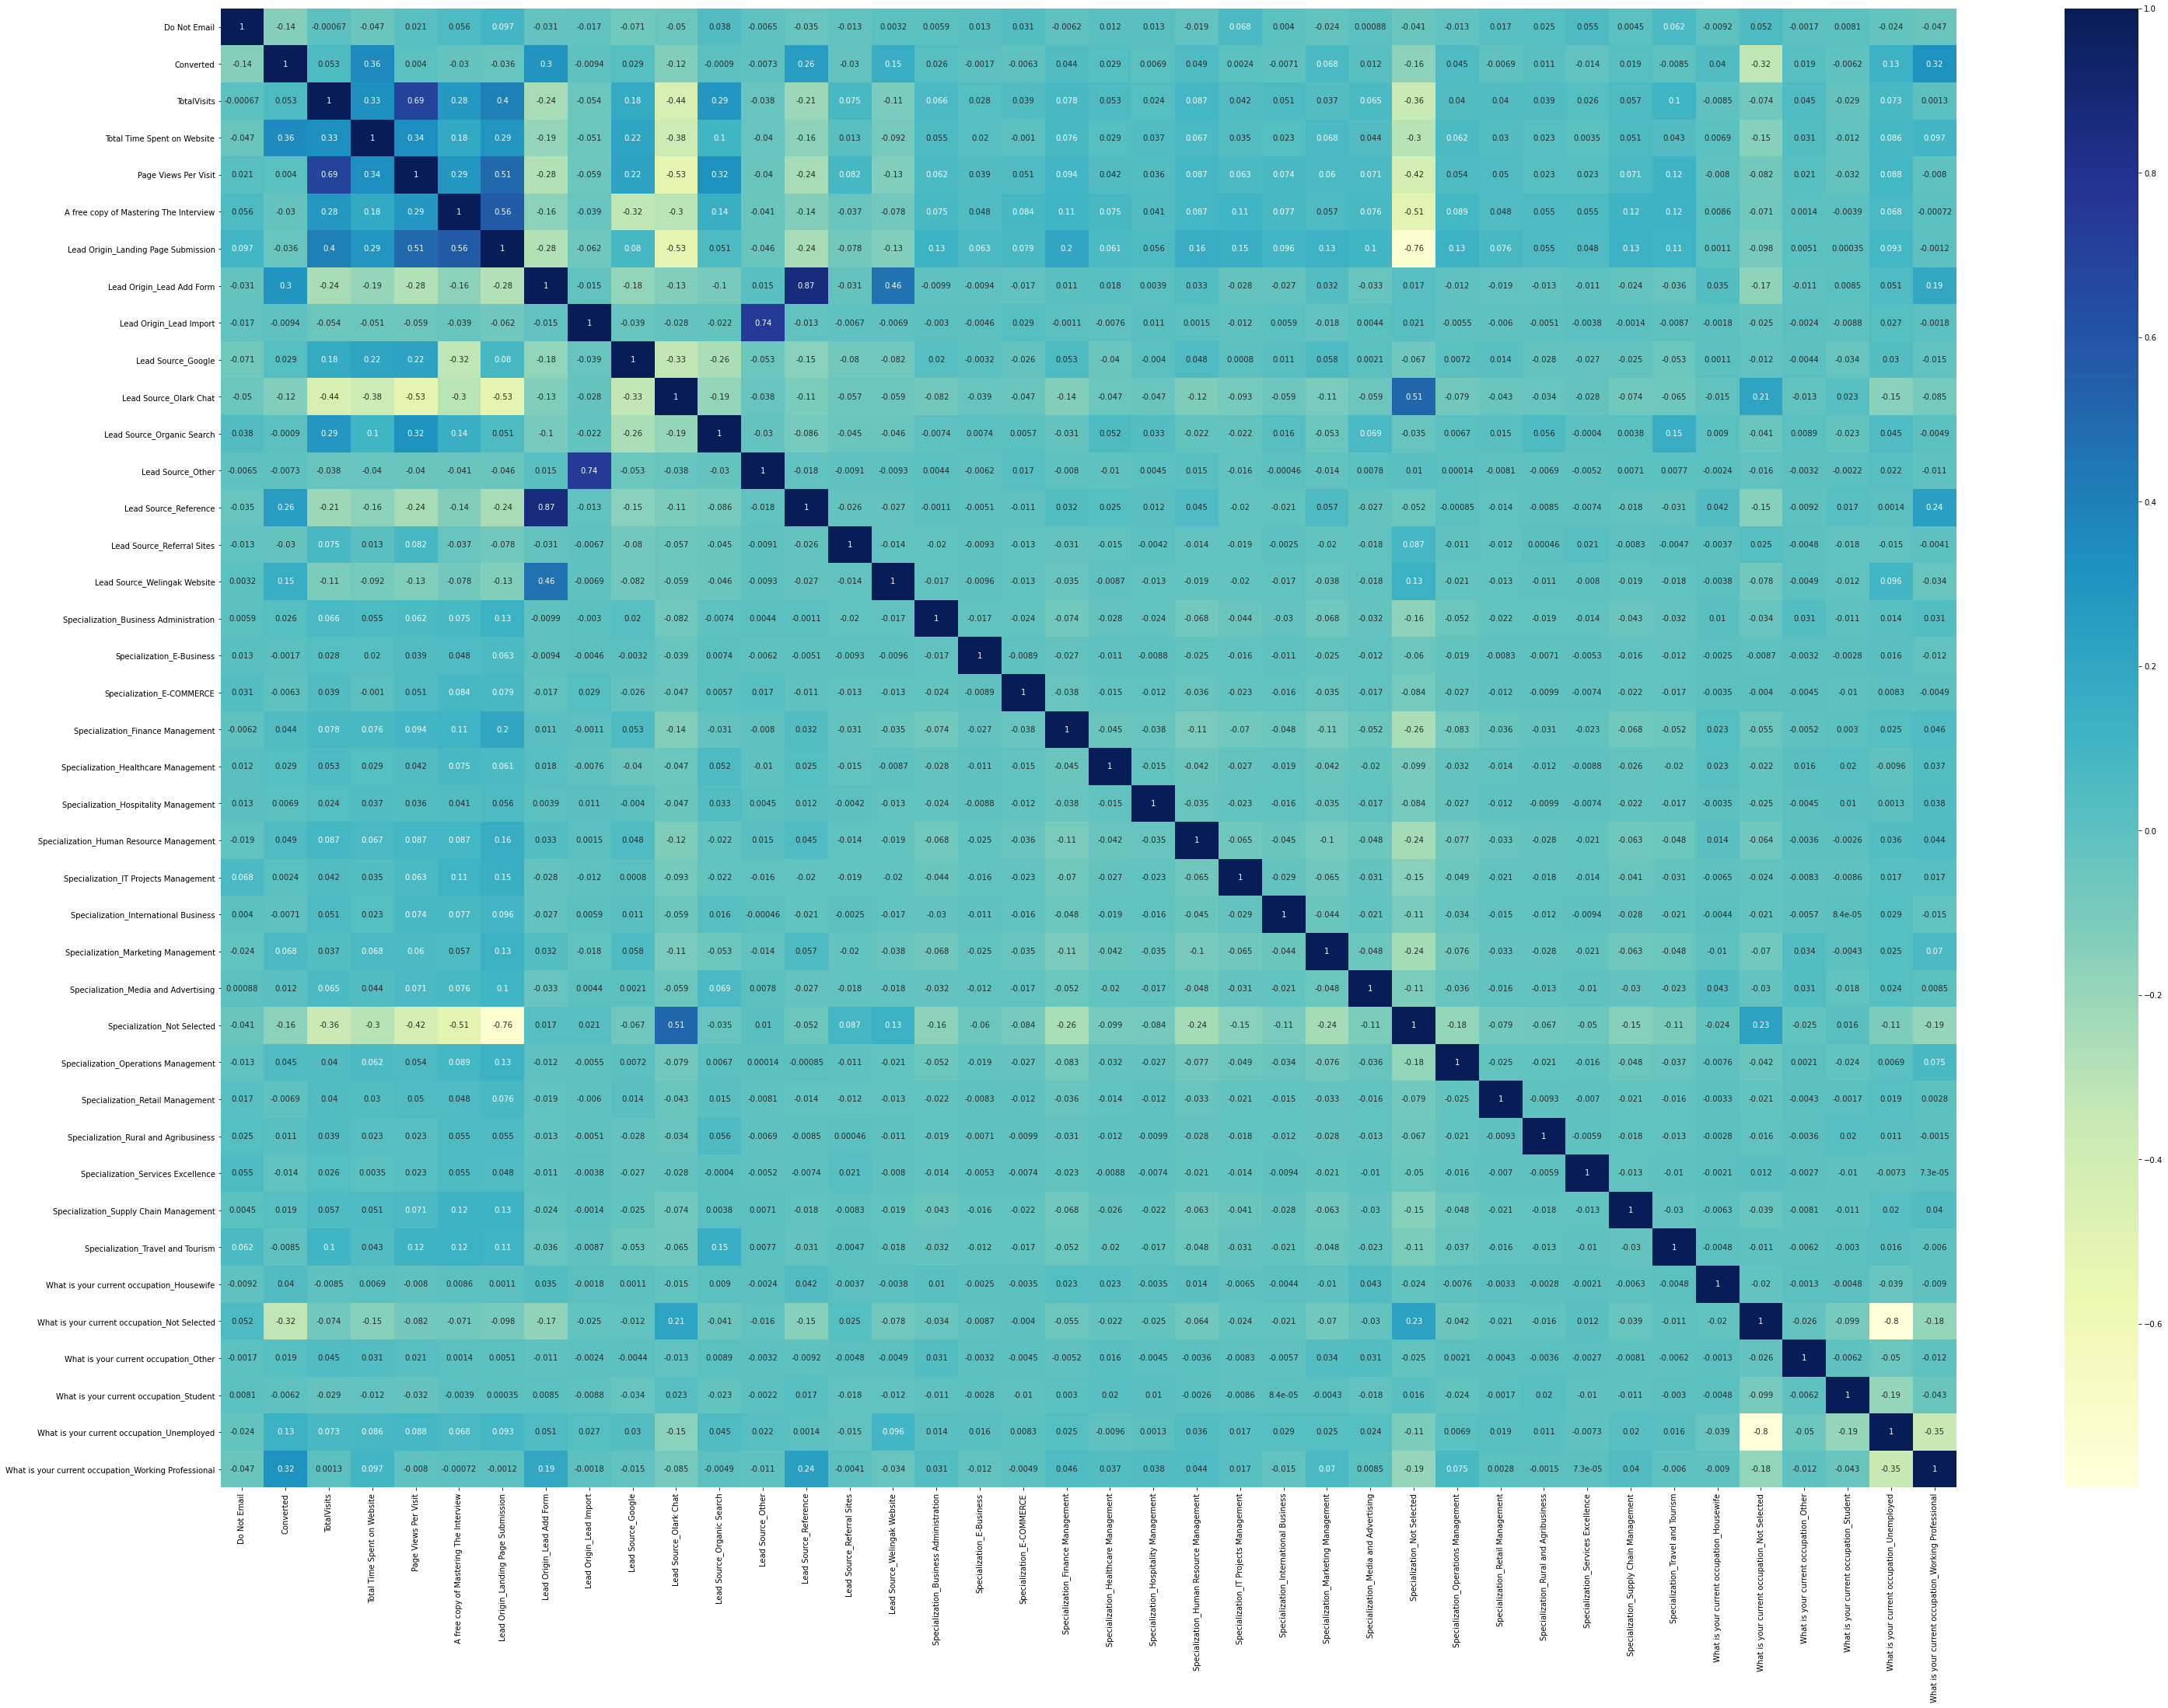

In [67]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,35))        # Size of the figure
sns.heatmap(leads_df.corr(),annot = True, cmap="YlGnBu")
plt.show()

### Observation
* Since there are many fields, a table view will be better to observe correlations (vs plotting on heatmap)

In [68]:
leads_df.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Selected,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
Do Not Email,1.000000,-0.139715,-0.000670,-0.046548,0.021064,0.056347,0.097022,-0.030713,-0.016779,-0.070594,-0.049818,0.037555,-0.006492,-0.035343,-0.012574,0.003248,0.005917,0.013293,0.031215,-0.006160,0.012403,0.012848,-0.018727,0.068358,0.004024,-0.024377,0.000884,-0.040830,-0.012521,0.017330,0.025498,0.055148,0.004476,0.062025,-0.009180,0.051642,-0.001726,0.008084,-0.024323,-0.046620
Converted,-0.139715,1.000000,0.052506,0.359646,0.004002,-0.030459,-0.036189,0.300682,-0.009377,0.028786,-0.124603,-0.000903,-0.007273,0.255295,-0.030069,0.150144,0.025787,-0.001715,-0.006322,0.043581,0.028576,0.006912,0.049312,0.002426,-0.007117,0.067718,0.012131,-0.161735,0.044857,-0.006887,0.010587,-0.014268,0.019380,-0.008530,0.040403,-0.321916,0.018576,-0.006181,0.127198,0.316178
TotalVisits,-0.000670,0.052506,1.000000,0.328952,0.689369,0.276816,0.402336,-0.244134,-0.053632,0.175607,-0.443039,0.289644,-0.038226,-0.213204,0.075402,-0.113642,0.065747,0.027718,0.038621,0.077733,0.052837,0.023576,0.087044,0.041984,0.051353,0.036639,0.065182,-0.361205,0.040223,0.039535,0.039091,0.026261,0.057492,0.100628,-0.008466,-0.073633,0.045459,-0.029150,0.072567,0.001338
Total Time Spent on Website,-0.046548,0.359646,0.328952,1.000000,0.336208,0.178868,0.293552,-0.188813,-0.050800,0.215892,-0.379205,0.101172,-0.039972,-0.163177,0.012547,-0.092160,0.055349,0.019964,-0.001037,0.075675,0.029198,0.037289,0.067307,0.035063,0.023378,0.068245,0.043709,-0.298376,0.062181,0.030202,0.022970,0.003519,0.051486,0.043389,0.006903,-0.148359,0.031465,-0.012465,0.086105,0.097211
Page Views Per Visit,0.021064,0.004002,0.689369,0.336208,1.000000,0.285300,0.507756,-0.281600,-0.058601,0.222213,-0.526861,0.317954,-0.040352,-0.244204,0.081644,-0.131349,0.061636,0.038843,0.050919,0.094445,0.042228,0.035614,0.087118,0.062617,0.074215,0.060098,0.071046,-0.424814,0.054322,0.049766,0.022893,0.022857,0.070829,0.121056,-0.007957,-0.081591,0.021289,-0.032291,0.087924,-0.008047
A free copy of Mastering The Interview,0.056347,-0.030459,0.276816,0.178868,0.285300,1.000000,0.564727,-0.162130,-0.039362,-0.323462,-0.300907,0.143942,-0.040553,-0.138143,-0.036564,-0.078070,0.074703,0.047667,0.083517,0.113692,0.074544,0.041258,0.086672,0.107924,0.076516,0.057421,0.075912,-0.511174,0.088849,0.047839,0.054988,0.054708,0.116978,0.123418,0.008586,-0.070892,0.001364,-0.003909,0.068278,-0.000721
Lead Origin_Landing Page Submission,0.097022,-0.036189,0.402336,0.293552,0.507756,0.564727,1.000000,-0.282242,-0.062202,0.080259,-0.528659,0.051395,-0.046149,-0.244404,-0.078030,-0.129698,0.134042,0.062624,0.079175,0.202615,0.060917,0.056343,0.157799,0.145846,0.096421,0.132887,0.100660,-0.756196,0.125944,0.075613,0.054829,0.048425,0.126744,0.111613,0.001131,-0.09

### Observation
* Even though the plot is nor ver clear because of high number of variales, we can clearly observe multicollinearity among some variables 
* Variables 'Lead Source_Reference' and 'Lead Origin_Lead Add Form' have correlation of 0.87

In [69]:
#Dropping these highly correlated variables

X_test = X_test.drop(['Lead Source_Reference'], 1)

X_train = X_train.drop(['Lead Source_Reference'], 1)


# 4. Modeling

## 1. First Training Model
Using statsmodel to build the model

In [70]:
# Logistic regression (binomial) model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2824.4
Date:                Tue, 08 Feb 2022   Deviance:                       5648.8
Time:                        17:14:27   Pearson chi2:                 6.42e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6490      0.941     -0.689      0.491      -2.494       1.196
Do Not Email                                            -1.4699      0.172     -8.527      0.000      -1.808      -1.132
TotalVisits                                              0.1778      0.046      3.839      0.000       0.087       0.269
Total Time Spent on Website                              1.0796      0.039     27.642      0.000       1.003       1.156
Page Views Per Visit                                    -0.0830      0.051     -1.618      0.106      -0.184       0.018
A free copy of Mastering The Interview                  -0.0790      0.104     -0.759      0.448      -0.283       0.125
Lead Origin_Landing Page Submission                     -0.5636      0.129     -4.367      0.000      -0.817      -0.311
Lead Origin_Lead Add Form                                3.5140      0.254     13.856      0.000       3.017       4.011
Lead Origin_Lead Import                                  0.6060      0.861      0.704      0.481      -1.081       2.293
Lead Source_Google                                       0.3000      0.110      2.728      0.006       0.084       0.516
Lead Source_Olark Chat                                   1.2332      0.153      8.085      0.000       0.934       1.532
Lead Source_Organic Search                               0.2253      0.126      1.795      0.073      -0.021       0.471
Lead Source_Other                                        0.1216      0.700      0.174      0.862      -1.249       1.493
Lead Source_Referral Sites                              -0.4173      0.330     -1.266      0.205      -1.063       0.229
Lead Source_Welingak Website                             3.1847      1.032      3.085      0.002       1.161       5.208
Specialization_Business Administration                  -0.2984      0.231     -1.293      0.196      -0.751       0.154
Specialization_E-Business                                0.0814      0.404      0.201      0.840      -0.711       0.874
Specialization_E-COMMERCE                               -0.0395      0.343     -0.115      0.908      -0.713       0.634
Specialization_Finance Management                       -0.2382      0.197     -1.207      0.227      -0.625       0.149
Specialization_Healthcare Management                    -0.0436      0.299     -0.145      0.884      -0.630       0.543
Specialization_Hospitality Management                   -0.9430      0.346     -2.728      0.006      -1.620      -0.266
Specialization_Human Resource Management                -0.2264      0.200     -1.130      0.259      -0.619       0.166
Specialization_IT Projects Management                   -0

### Observation
* There are many features with high P values and clearly there's a lot of scope for feature elimination
* We will use feature selection using RFE

## Feature Selection Using RFE
Using RFE from sklearn

In [71]:
logreg = LogisticRegression()

In [72]:
# Running RFE to retain 15 features
rfe = RFE(logreg, 15) 
rfe = rfe.fit(X_train, y_train)

In [73]:
# See whether the columns are in the top 15
rfe.support_

array([ True, False,  True, False, False,  True,  True,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True])

In [74]:
# See the actual column names
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('A free copy of Mastering The Interview', False, 17),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Other', False, 8),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-Business', False, 6),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_Finance Management', False, 15),
 ('Specialization_Healthcare Management', False, 20),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 16),
 ('Specialization_IT Projects Management', False, 24),
 ('Specialization_Internati

In [75]:
# assign included columns to col variable to be used in the training set
col = X_train.columns[rfe.support_]

In [76]:
# See excluded columns
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other'],
      dtype='object')

## Assess model with StatsModels

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2843.1
Date:                Tue, 08 Feb 2022   Deviance:                       5686.2
Time:                        17:14:31   Pearson chi2:                 6.43e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0275      0.632      0.043      0.965      -1.211       1.266
Do Not Email                                            -1.5040      0.170     -8.851      0.000      -1.837      -1.171
Total Time Spent on Website                              1.0852      0.039     27.951      0.000       1.009       1.161
Lead Origin_Landing Page Submission                     -0.7393      0.121     -6.103      0.000      -0.977      -0.502
Lead Origin_Lead Add Form                                3.1571      0.230     13.744      0.000       2.707       3.607
Lead Origin_Lead Import                                  0.3408      0.507      0.672      0.502      -0.653       1.335
Lead Source_Olark Chat                                   0.8876      0.114      7.779      0.000       0.664       1.111
Lead Source_Referral Sites                              -0.6255      0.317     -1.971      0.049      -1.248      -0.003
Lead Source_Welingak Website                             3.2044      1.033      3.103      0.002       1.181       5.228
Specialization_Hospitality Management                   -0.7330      0.301     -2.434      0.015      -1.323      -0.143
Specialization_Not Selected                             -0.7643      0.116     -6.569      0.000      -0.992      -0.536
What is your current occupation_Housewife               22.2778   1.45e+04      0.002      0.999   -2.83e+04    2.84e+04
What is your current occupation_Not Selected            -1.3320      0.633     -2.106      0.035      -2.572      -0.092
What is your current occupation_Student                 -0.3134      0.662     -0.473      0.636      -1.611       0.984
What is your current occupation_Unemployed               0.0164      0.629      0.026      0.979      -1.216       1.249
What is your current occupation_Working Professional     2.2913      0.651      3.521      0.000       1.016       3.567
========================================================================================================================
"""

### Observation:
* With RFE completed, some of the variables have high P values, whichcan be further reduced later

In [78]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2974    0.089825
8085    0.903392
8805    0.500674
8270    0.249255
5584    0.246039
8000    0.234681
7418    0.061502
5264    0.104632
6435    0.780689
1601    0.047723
dtype: float64

In [79]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08982472, 0.90339179, 0.50067444, 0.24925496, 0.24603891,
       0.23468148, 0.06150155, 0.10463172, 0.78068871, 0.04772308])

In [80]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

In [81]:
# Creat new column 'predicted' with 1 if Convert_Prob > 0.5 else 0 (Choose 0.5 for now and we can revisit this later)
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect ID,predicted
0,1,0.089825,2974,0
1,1,0.903392,8085,1
2,1,0.500674,8805,1
3,1,0.249255,8270,0
4,0,0.246039,5584,0


In [82]:
# Confusion matrix to look at accuracy
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3499  424]
 [ 866 1544]]


### Observation:
Predicted....................not_converted............converted<br>
Actual<br>
not_converted..................3499......................424<br>
converted.......................866......................1544<br>  

* Misclassification is occurring
- 424 are not converted which has been predicted as converted
- 866 are converted which has been predicted as not converted

In [83]:
# Get the accuracy (How many predictions were correct) using sklearn accuracy_score
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7963050686878257


### Observation
* With an accuracy score of 79.63%, this is a good accuracy for the first model

## Manual Feature Elimination

## Model 2

### Check VIF

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,8.02
2,Lead Origin_Landing Page Submission,7.43
11,What is your current occupation_Not Selected,4.93
9,Specialization_Not Selected,4.74
5,Lead Source_Olark Chat,2.24
3,Lead Origin_Lead Add Form,2.00
14,What is your current occupation_Working Profes...,1.78
7,Lead Source_Welingak Website,1.40
1,Total Time Spent on Website,1.32
12,What is your current occupation_Student,1.32


In [85]:
# 'What is your current occupation_Unemployed' has high VIF and high P value. Dropping it.
col = col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Not Selected',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not Selected',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [86]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2843.1
Date:                Tue, 08 Feb 2022   Deviance:                       5686.2
Time:                        17:14:32   Pearson chi2:                 6.43e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0437      0.116      0.375      0.707      -0.184       0.272
Do Not Email                                            -1.5040      0.170     -8.851      0.000      -1.837      -1.171
Total Time Spent on Website                              1.0852      0.039     27.954      0.000       1.009       1.161
Lead Origin_Landing Page Submission                     -0.7391      0.121     -6.109      0.000      -0.976      -0.502
Lead Origin_Lead Add Form                                3.1572      0.230     13.744      0.000       2.707       3.607
Lead Origin_Lead Import                                  0.3409      0.507      0.672      0.501      -0.653       1.335
Lead Source_Olark Chat                                   0.8876      0.114      7.779      0.000       0.664       1.111
Lead Source_Referral Sites                              -0.6254      0.317     -1.971      0.049      -1.247      -0.003
Lead Source_Welingak Website                             3.2044      1.033      3.103      0.002       1.181       5.228
Specialization_Hospitality Management                   -0.7329      0.301     -2.434      0.015      -1.323      -0.143
Specialization_Not Selected                             -0.7642      0.116     -6.577      0.000      -0.992      -0.536
What is your current occupation_Housewife               22.2614   1.45e+04      0.002      0.999   -2.83e+04    2.84e+04
What is your current occupation_Not Selected            -1.3484      0.085    -15.837      0.000      -1.515      -1.182
What is your current occupation_Student                 -0.3298      0.214     -1.542      0.123      -0.749       0.089
What is your current occupation_Working Professional     2.2749      0.176     12.915      0.000       1.930       2.620
========================================================================================================================
"""

In [87]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2974    0.089825
8085    0.903378
8805    0.500669
8270    0.249247
5584    0.246043
8000    0.234674
7418    0.061502
5264    0.104633
6435    0.780676
1601    0.047724
dtype: float64

In [88]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.089825  , 0.90337802, 0.50066898, 0.24924663, 0.24604282,
       0.23467367, 0.06150244, 0.10463335, 0.78067555, 0.04772394])

In [89]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

In [90]:
# Creat new column 'predicted' with 1 if Convert_Prob > 0.5 else 0 (Choose 0.5 for now and we can revisit this later)
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect ID,predicted
0,1,0.089825,2974,0
1,1,0.903378,8085,1
2,1,0.500669,8805,1
3,1,0.249247,8270,0
4,0,0.246043,5584,0


In [91]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7963050686878257


### Observation:
* With an accuracy score of 79.63%, accuracy did not change much by dropping this feature

## Model 3

In [92]:
# Check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Not Selected,2.10
5,Lead Source_Olark Chat,1.92
11,What is your current occupation_Not Selected,1.60
3,Lead Origin_Lead Add Form,1.52
2,Lead Origin_Landing Page Submission,1.41
7,Lead Source_Welingak Website,1.37
1,Total Time Spent on Website,1.28
13,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.11
6,Lead Source_Referral Sites,1.04


In [93]:
# 'What is your current occupation_Housewife' has a high p value. Dropping it.
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Not Selected',
       'What is your current occupation_Not Selected',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [94]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2847.1
Date:                Tue, 08 Feb 2022   Deviance:                       5694.3
Time:                        17:14:32   Pearson chi2:                 6.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0483      0.116      0.415      0.678      -0.180       0.276
Do Not Email                                            -1.5074      0.170     -8.872      0.000      -1.840      -1.174
Total Time Spent on Website                              1.0845      0.039     27.957      0.000       1.008       1.161
Lead Origin_Landing Page Submission                     -0.7383      0.121     -6.107      0.000      -0.975      -0.501
Lead Origin_Lead Add Form                                3.1667      0.229     13.799      0.000       2.717       3.617
Lead Origin_Lead Import                                  0.3378      0.507      0.666      0.505      -0.656       1.332
Lead Source_Olark Chat                                   0.8866      0.114      7.770      0.000       0.663       1.110
Lead Source_Referral Sites                              -0.6266      0.317     -1.975      0.048      -1.249      -0.005
Lead Source_Welingak Website                             3.1941      1.033      3.094      0.002       1.170       5.218
Specialization_Hospitality Management                   -0.7368      0.301     -2.447      0.014      -1.327      -0.147
Specialization_Not Selected                             -0.7678      0.116     -6.612      0.000      -0.995      -0.540
What is your current occupation_Not Selected            -1.3509      0.085    -15.871      0.000      -1.518      -1.184
What is your current occupation_Student                 -0.3334      0.214     -1.559      0.119      -0.753       0.086
What is your current occupation_Working Professional     2.2703      0.176     12.889      0.000       1.925       2.616
========================================================================================================================
"""

In [95]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2974    0.089629
8085    0.904662
8805    0.501067
8270    0.250307
5584    0.245656
8000    0.235700
7418    0.061692
5264    0.104444
6435    0.781392
1601    0.047881
dtype: float64

In [96]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08962901, 0.90466201, 0.50106703, 0.25030652, 0.24565624,
       0.23569989, 0.06169187, 0.1044436 , 0.78139226, 0.04788065])

In [97]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

In [98]:
# Creat new column 'predicted' with 1 if Convert_Prob > 0.5 else 0 (Choose 0.5 for now and we can revisit this later)
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect ID,predicted
0,1,0.089629,2974,0
1,1,0.904662,8085,1
2,1,0.501067,8805,1
3,1,0.250307,8270,0
4,0,0.245656,5584,0


In [99]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.795989262592768


### Observation:
* With an accuracy score of 79.6%, accuracy did not change much by dropping this feature

## Model 4

In [100]:
# Check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Not Selected,2.10
5,Lead Source_Olark Chat,1.92
10,What is your current occupation_Not Selected,1.60
3,Lead Origin_Lead Add Form,1.51
2,Lead Origin_Landing Page Submission,1.41
7,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.28
12,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
6,Lead Source_Referral Sites,1.04


In [101]:
# 'Lead Origin_Lead Import' has a high P value Dropping it.
col = col.drop('Lead Origin_Lead Import', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_Not Selected',
       'What is your current occupation_Not Selected',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [102]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2847.4
Date:                Tue, 08 Feb 2022   Deviance:                       5694.7
Time:                        17:14:33   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0602      0.115      0.523      0.601      -0.165       0.286
Do Not Email                                            -1.5083      0.170     -8.878      0.000      -1.841      -1.175
Total Time Spent on Website                              1.0822      0.039     28.027      0.000       1.007       1.158
Lead Origin_Landing Page Submission                     -0.7490      0.120     -6.250      0.000      -0.984      -0.514
Lead Origin_Lead Add Form                                3.1557      0.229     13.787      0.000       2.707       3.604
Lead Source_Olark Chat                                   0.8778      0.113      7.750      0.000       0.656       1.100
Lead Source_Referral Sites                              -0.6316      0.317     -1.992      0.046      -1.253      -0.010
Lead Source_Welingak Website                             3.1970      1.033      3.096      0.002       1.173       5.221
Specialization_Hospitality Management                   -0.7333      0.301     -2.433      0.015      -1.324      -0.143
Specialization_Not Selected                             -0.7735      0.116     -6.674      0.000      -1.001      -0.546
What is your current occupation_Not Selected            -1.3516      0.085    -15.884      0.000      -1.518      -1.185
What is your current occupation_Student                 -0.3340      0.214     -1.562      0.118      -0.753       0.085
What is your current occupation_Working Professional     2.2712      0.176     12.894      0.000       1.926       2.616
========================================================================================================================
"""

In [103]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2974    0.090074
8085    0.904913
8805    0.500082
8270    0.250683
5584    0.244610
8000    0.236091
7418    0.061801
5264    0.104328
6435    0.780869
1601    0.047993
dtype: float64

In [104]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

In [105]:
# Creat new column 'predicted' with 1 if Convert_Prob > 0.5 else 0 (Choose 0.5 for now and we can revisit this later)
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect ID,predicted
2974,1,0.090074,2974,0
8085,1,0.904913,8085,1
8805,1,0.500082,8805,1
8270,1,0.250683,8270,0
5584,0,0.244610,5584,0


In [106]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7961471656402969


### Observation
* With an accuracy score of 79.61%, accuracy did not change much by dropping this feature

## Model 5

In [107]:
# Check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Not Selected,2.09
4,Lead Source_Olark Chat,1.91
9,What is your current occupation_Not Selected,1.60
3,Lead Origin_Lead Add Form,1.51
2,Lead Origin_Landing Page Submission,1.41
6,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.27
11,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
5,Lead Source_Referral Sites,1.04


In [108]:
# 'What is your current occupation_Student' has a high P value. Dropping it.
col = col.drop('What is your current occupation_Student', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_Not Selected',
       'What is your current occupation_Not Selected',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [109]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.6
Date:                Tue, 08 Feb 2022   Deviance:                       5697.2
Time:                        17:14:34   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0563      0.115      0.490      0.624      -0.169       0.281
Do Not Email                                            -1.5071      0.170     -8.878      0.000      -1.840      -1.174
Total Time Spent on Website                              1.0810      0.039     28.022      0.000       1.005       1.157
Lead Origin_Landing Page Submission                     -0.7552      0.120     -6.310      0.000      -0.990      -0.521
Lead Origin_Lead Add Form                                3.1437      0.229     13.742      0.000       2.695       3.592
Lead Source_Olark Chat                                   0.8681      0.113      7.678      0.000       0.647       1.090
Lead Source_Referral Sites                              -0.6255      0.317     -1.973      0.048      -1.247      -0.004
Lead Source_Welingak Website                             3.2126      1.032      3.112      0.002       1.189       5.236
Specialization_Hospitality Management                   -0.7407      0.301     -2.461      0.014      -1.331      -0.151
Specialization_Not Selected                             -0.7784      0.116     -6.728      0.000      -1.005      -0.552
What is your current occupation_Not Selected            -1.3394      0.085    -15.807      0.000      -1.505      -1.173
What is your current occupation_Working Professional     2.2816      0.176     12.962      0.000       1.937       2.627
========================================================================================================================
"""

In [110]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2974    0.089465
8085    0.903627
8805    0.500069
8270    0.248892
5584    0.244745
8000    0.234388
7418    0.061976
5264    0.103852
6435    0.778771
1601    0.048144
dtype: float64

In [111]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08946469, 0.90362735, 0.50006884, 0.24889165, 0.24474501,
       0.23438822, 0.06197564, 0.10385218, 0.77877087, 0.04814417])

In [112]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

In [113]:
# Creat new column 'predicted' with 1 if Convert_Prob > 0.5 else 0 (Choose 0.5 for now and we can revisit this later)
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect ID,predicted
0,1,0.089465,2974,0
1,1,0.903627,8085,1
2,1,0.500069,8805,1
3,1,0.248892,8270,0
4,0,0.244745,5584,0


In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7966208747828833


### Observation
* With an accuracy score of 79.66%, accuracy did not change much by dropping this feature

## Model 6

In [115]:
# Check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Not Selected,2.07
4,Lead Source_Olark Chat,1.91
9,What is your current occupation_Not Selected,1.58
3,Lead Origin_Lead Add Form,1.51
2,Lead Origin_Landing Page Submission,1.38
6,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.27
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
5,Lead Source_Referral Sites,1.04


In [116]:
# 'Lead Source_Referral Sites' has a relatively high P value. Dropping it.
col = col.drop('Lead Source_Referral Sites', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Not Selected',
       'What is your current occupation_Not Selected',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [117]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.7
Date:                Tue, 08 Feb 2022   Deviance:                       5701.3
Time:                        17:14:34   Pearson chi2:                 6.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0310      0.114      0.272      0.786      -0.193       0.255
Do Not Email                                            -1.5025      0.170     -8.856      0.000      -1.835      -1.170
Total Time Spent on Website                              1.0812      0.039     28.033      0.000       1.006       1.157
Lead Origin_Landing Page Submission                     -0.7324      0.119     -6.154      0.000      -0.966      -0.499
Lead Origin_Lead Add Form                                3.1721      0.228     13.890      0.000       2.724       3.620
Lead Source_Olark Chat                                   0.8986      0.112      8.008      0.000       0.679       1.119
Lead Source_Welingak Website                             3.2148      1.032      3.114      0.002       1.191       5.238
Specialization_Hospitality Management                   -0.7366      0.301     -2.449      0.014      -1.326      -0.147
Specialization_Not Selected                             -0.7850      0.116     -6.794      0.000      -1.011      -0.559
What is your current occupation_Not Selected            -1.3382      0.085    -15.800      0.000      -1.504      -1.172
What is your current occupation_Working Professional     2.2795      0.176     12.944      0.000       1.934       2.625
========================================================================================================================
"""

In [118]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2974    0.087269
8085    0.903879
8805    0.499850
8270    0.248410
5584    0.245443
8000    0.233923
7418    0.061889
5264    0.103810
6435    0.778420
1601    0.048073
dtype: float64

In [119]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

In [120]:
# Creat new column 'predicted' with 1 if Convert_Prob > 0.5 else 0 (Choose 0.5 for now and we can revisit this later)
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect ID,predicted
2974,1,0.087269,2974,0
8085,1,0.903879,8085,1
8805,1,0.499850,8805,0
8270,1,0.248410,8270,0
5584,0,0.245443,5584,0


In [121]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7972524869729986


### Observation
* With an accuracy score of 79.73%, accuracy did not change much by dropping this feature

In [122]:
# Check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_Not Selected,2.01
4,Lead Source_Olark Chat,1.88
8,What is your current occupation_Not Selected,1.58
3,Lead Origin_Lead Add Form,1.51
2,Lead Origin_Landing Page Submission,1.38
5,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.27
9,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
6,Specialization_Hospitality Management,1.02


### Observation
* All variable have very good VIF <= 2.01 and P values below <= 0.014. We can proceed with making predictions using this model

In [123]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3502,  421],
       [ 863, 1547]])

### Observation:

Predicted....................not_converted..............converted<br>
Actual<br>
not_converted..................3502......................421<br>
converted.......................863......................1547  

- 421 are not converted which has been predicted as converted
- 863 are converted which has been predicted as not converted

## Check sensitivity and specifity of model

In [124]:
# Define TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Let's see the sensitivity, the ability for the model to correctly predict those that convert
TP / float(TP+FN)

0.6419087136929461

### Observation
* Only predicted 64.19% of actual conversions so not very good sensitivity.

In [126]:
# Let us calculate specificity, the ability for the model to correctly predict those that don't convert
TN / float(TN+FP)

0.8926841702778486

### Observation
* Predicted 89.27% of those that have not converted, a decent specificity.

In [127]:
# Calculate false postive rate - predicting conversion when customer hasn't converted
FP / float(TN+FP)

0.10731582972215141

### Observation
* 10.73% of the cases has been falsely classified as not converted

In [128]:
# positive predictive value - predicting precision 
print (TP / float(TP+FP))

0.7860772357723578


### Observation
* 78.61% of predictions for conversion turned out to be correct.

In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.802290950744559


### Observation
* 80.23% of predictions for not converting turned out to be correct.

## Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

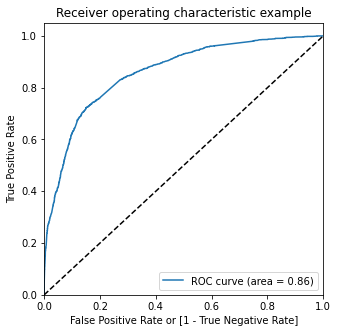

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

### Observation
* ROC curve area = 0.86 which indicates a decent model

## Find Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
2974,1,0.087269,2974,0,1,0,0,0,0,0,0,0,0,0
8085,1,0.903879,8085,1,1,1,1,1,1,1,1,1,1,1
8805,1,0.499850,8805,0,1,1,1,1,1,0,0,0,0,0
8270,1,0.248410,8270,0,1,1,1,0,0,0,0,0,0,0
5584,0,0.245443,5584,0,1,1,1,0,0,0,0,0,0,0


In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380546  1.000000  0.000000
0.1   0.1  0.531344  0.979253  0.256181
0.2   0.2  0.684983  0.909544  0.547030
0.3   0.3  0.764409  0.832365  0.722661
0.4   0.4  0.800726  0.714108  0.853938
0.5   0.5  0.797252  0.641909  0.892684
0.6   0.6  0.782568  0.566390  0.915371
0.7   0.7  0.759672  0.463900  0.941371
0.8   0.8  0.731723  0.348133  0.967372
0.9   0.9  0.702037  0.231950  0.990823


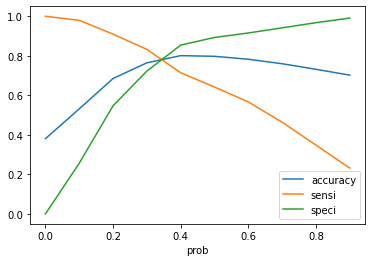

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observation
* 0.35 is the optimum point to take a cutoff probability

### Precision and recall tradeoff
##### Precision
- TP / TP + FP

##### Recall
- TP / TP + FN

In [136]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(2974    1
 8085    1
 8805    1
 8270    1
 5584    0
        ..
 5866    0
 5312    1
 5514    0
 898     0
 7434    0
 Name: Converted, Length: 6333, dtype: int64,
 2974    0
 8085    1
 8805    0
 8270    0
 5584    0
        ..
 5866    1
 5312    0
 5514    0
 898     0
 7434    0
 Name: predicted, Length: 6333, dtype: int64)

In [137]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

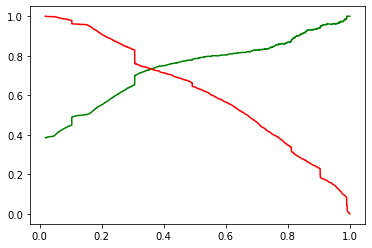

In [138]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Observations
* We can see from the Precision-Recall tradeoff curve that for the Sensitivity to be around 80%, the cutoff probability should be around .3

In [139]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
2974,1,0.087269,2974,0,1,0,0,0,0,0,0,0,0,0,0
8085,1,0.903879,8085,1,1,1,1,1,1,1,1,1,1,1,1
8805,1,0.499850,8805,0,1,1,1,1,1,0,0,0,0,0,1
8270,1,0.248410,8270,0,1,1,1,0,0,0,0,0,0,0,0
5584,0,0.245443,5584,0,1,1,1,0,0,0,0,0,0,0,0


In [140]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7644086530870046

In [141]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2835, 1088],
       [ 404, 2006]])

### Observation:

Predicted....................not_converted..............converted<br>
Actual<br>
not_converted..................2835......................1088<br>
converted.......................404......................2006<br>

* 1088 are not converted which has been predicted as converted
* 404 are converted which has been predicted as not converted

In [142]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
sensitivity = "{:.2f}".format((TP/float(TP+FN))*100)           # How many conversions are correctly predicted (recall)
specificity = "{:.2f}".format((TN/float(TN+FP))*100)           # How many non conversions are correctly predicted
precision = "{:.2f}".format((TP/float(TP+FP))*100)             # Accuracy of conversion prediction
false_positive_rate = "{:.2f}".format((FP/float(TN+FP))*100)     # Falsely predicting conversion when lead hasn't converted
print('sensitivity: ' + str(sensitivity))
print('specificity: ' + str(specificity))
print('precision: ' + str(precision))
print('false positive rate: ' + str(false_positive_rate))

sensitivity: 83.24
specificity: 72.27
precision: 64.84
false positive rate: 27.73


### Observation
* As per the problem statement, the CEO wants the lead conversion conversion to be around 80%.
* The current model has sensitivity/recall at 83.24%, which is good enough
* We will further check the sensitivity for the test set, which should be around 80% to fulfill the criteria given in the problem statement

## 5. Model validation

In [144]:
# Scale the test dataset
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Selected,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
5895,0,-0.105573,0.120896,0.315340,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1373,0,-0.105573,-0.313010,0.315340,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6635,0,0.508379,-0.580311,0.069065,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6416,0,-1.026500,-0.889721,-1.162310,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1763,0,-0.105573,-0.393567,0.315340,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [145]:
# Add constant to test dataset
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Not Selected,What is your current occupation_Not Selected,What is your current occupation_Working Professional
5895,1.0,0,0.120896,1,0,0,0,0,0,0,0
1373,1.0,0,-0.313010,1,0,0,0,0,0,0,0
6635,1.0,0,-0.580311,1,0,0,0,0,0,1,0
6416,1.0,0,-0.889721,0,0,1,0,0,0,0,0
1763,1.0,0,-0.393567,0,0,0,0,0,1,0,0


Making predictions on the test set

In [146]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

5895    0.361087
1373    0.261188
6635    0.064945
6416    0.491903
1763    0.235150
8804    0.737073
737     0.995747
2481    0.903879
5712    0.103810
3358    0.074701
dtype: float64

In [147]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.361087  , 0.26118776, 0.06494499, 0.49190267, 0.23514985,
       0.73707329, 0.99574721, 0.90387898, 0.10380994, 0.07470135])

In [148]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Convert_Prob':y_test_pred})
y_test_pred_final['Prospect ID'] = y_test.index
y_test_pred_final.head()

,Converted,Convert_Prob,Prospect ID
0,1,0.361087,5895
1,0,0.261188,1373
2,0,0.064945,6635
3,0,0.491903,6416
4,0,0.235150,1763


In [149]:
# Creat new column 'predicted' with 1 if Convert_Prob > 0.3 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_test_pred_final.head()

,Converted,Convert_Prob,Prospect ID,predicted
0,1,0.361087,5895,1
1,0,0.261188,1373,0
2,0,0.064945,6635,0
3,0,0.491903,6416,1
4,0,0.235150,1763,0


In [150]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted)

0.7697974217311234

In [151]:
confusion3 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
confusion3

array([[1242,  455],
       [ 170,  848]])

### Observation

Predicted....................not_converted..............converted<br>
Actual<br>
not_converted..................1242......................455<br>
converted.......................170......................848<br>

* 455 are not converted which has been predicted as converted
* 170 are converted which has been predicted as not converted

In [152]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our logistic regression model
sensitivity = "{:.2f}".format((TP/float(TP+FN))*100)           # How many conversions are correctly predicted (recall)
specificity = "{:.2f}".format((TN/float(TN+FP))*100)           # How many non conversions are correctly predicted
precision = "{:.2f}".format((TP/float(TP+FP))*100)             # Accuracy of conversion prediction
false_positive_rate = "{:.2f}".format((FP/float(TN+FP))*100)     # Falsely predicting conversion when lead hasn't converted
print('sensitivity: ' + str(sensitivity))
print('specificity: ' + str(specificity))
print('precision: ' + str(precision))
print('false positive rate: ' + str(false_positive_rate))

sensitivity: 83.30
specificity: 73.19
precision: 65.08
false positive rate: 26.81


### Observation
* Sensitivity of 83.3% fulfills the criteria of the problem statement, that the the model must have a conversion of around 80% 

### Observation
##### Train Data
- Accuracy : 76.44%
- Sensitivity : 83.24%
- Specificity : 72.27%
- Precision  : 64.84%

-------------
##### Test Data
- Accuracy : 76.98%
- Sensitivity : 83.30%
- Specificity : 73.19%
- Precision  : 65.08%


## Generate Lead Score

In [154]:
# Get lead score of train and test data based on convert probability
y_train_pred_final['Lead Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_test_pred_final['Lead Score'] = y_test_pred_final.Convert_Prob.map(lambda x: round(x*100))

In [155]:
# Combine y_train_pred_final and y_test_pred_final lead scores
lead_scores = pd.concat([y_train_pred_final,y_test_pred_final],ignore_index=True)
lead_scores.head()

,Converted,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,1,0.087269,2974,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,1,0.903879,8085,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,90
2,1,0.499850,8805,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,50
3,1,0.248410,8270,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
4,0,0.245443,5584,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25


## Feature Importance

In [156]:
model = LogisticRegression()
model.fit(X_train[col], y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train[col].columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

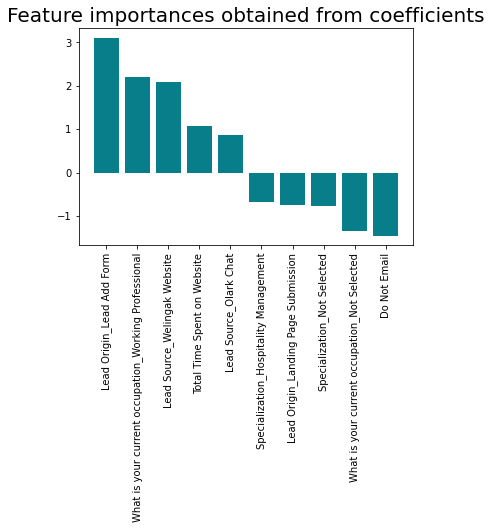

In [157]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Observation
Following features have the highest chances of conversion

* Lead Origin - Lead Add Form
* What is your current occupation - Working Professional
* Lead Source - Welingak Website
* Total Time Spent on Website
* Lead Source - Olark Chat

Following features have a negative affect on conversion

* Do Not Email
* What is your current occupation - Not Selected
* Specialization - Not Selected
* Lead Origin - Landing Page Submission
* Specialization - Hospitality Management
